In [30]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import os

In [31]:
ORIGINAL_FPS = 30
MANUAL_FPSS = ['1', '2', '3', '5', '6', '10', '15', '30']
USE_MANUAL_FPSS = True
THRESHOLD = 0.75

In [32]:
accuracy_result_dict_paths = [
	# '../assets/result/accuracy_movement/Video1_Accuracy_Result.json',
  # '../assets/result/accuracy_movement/Video2_Accuracy_Result.json',
  '../assets/result/accuracy_movement/Video3_Accuracy_Result.json',
  # '../assets/result/accuracy_movement/Video4_Accuracy_Result.json',
]

In [33]:
movement_result_dict_paths = [
	# '../assets/result/accuracy_movement/Video1_Movement_Result.json',
  # '../assets/result/accuracy_movement/Video2_Movement_Result.json',
  '../assets/result/accuracy_movement/Video3_Movement_Result.json',
  # '../assets/result/accuracy_movement/Video4_Movement_Result.json',
]

In [34]:
def round_floats_to_sigfigs(input_list, sigfigs):
	return [round(number, sigfigs) for number in input_list]

In [35]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
		
	return data

In [36]:
def extract_fpss(metric_list, data_type='metric'):
	return list(metric_list[list(metric_list.keys())[0]][0][data_type].keys())

In [37]:
def extract_metric_list(metric_list, fpss, feature='F1', data_type='metric'):
	result_column = {}
		
	for fps in fpss:
		if data_type == 'metric':
			result_column[fps] = [clip_metric[data_type][fps][feature] for clip_metric in metric_list]
		elif data_type == 'movement':
			result_column[fps] = [clip_metric[data_type][fps] for clip_metric in metric_list]
		
	return result_column

In [38]:
def cumulative_sum_list(input_list):
	result = []
	total = 0
	for item in input_list:
		total += item
		result.append(total)
	return result

def extract_metric_time(metric_list):
	frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
	time_list = cumulative_sum_list(frame_number_list)
	time_list = list(np.array(time_list) - time_list[0])
	scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

	return round_floats_to_sigfigs(scaled_time_list, 0)

In [39]:
colors = [
	'#e6194B',
	'#f58231',
	'#9A6324',
	'#911eb4',
	'#3cb44b',
	'#f032e6',
	'#4363d8',
  '#f7cc1d',
]

In [40]:
def plot_mutiple_lines(xs, yss, x_label, y_label, title, use_MANUAL_FPSS=False, plot_size=(36, 12), label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=plot_size)
		
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = list(yss.keys())

	for i in range(len(fpss)):
		fps = fpss[i]
		ax1.plot(xs, yss[fps], color=colors[i], marker='o', label=fps + " FPS")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [41]:
# def plot_mutiple_lines_horizontal(xs, yss, x_label, y_label, title, use_MANUAL_FPSS=False, line_y = 0.75, label_size=28, font_size=32, legend_size=16, line_width=3):
# 	fig, ax1 = plt.subplots(figsize=(36, 9))
		
# 	if use_MANUAL_FPSS:
# 		fpss = MANUAL_FPSS
# 	else:
# 		fpss = list(yss.keys())

# 	for i in range(len(fpss)):
# 		fps = fpss[i]
# 		ax1.plot(xs, yss[fps], color=colors[i], marker='o', label=fps + " FPS")
		
# 	ax1.axhline(y=line_y, color='grey', linestyle='--', linewidth=line_width, label="Required Accuracy")

# 	ax1.set_xlabel(x_label, fontsize=font_size)
# 	ax1.set_ylabel(y_label, fontsize=font_size)
# 	# ax1.set_title(title, fontsize=font_size)
# 	plt.xticks(fontsize=label_size)
# 	plt.yticks(fontsize=label_size)
# 	plt.legend(fontsize=legend_size)
# 	plt.grid(True)

# 	plt.show()

In [42]:
def find_max_index(string_list):
	# Convert each element to integer
	int_list = [int(element) for element in string_list]
		
	# Find index of maximum integer value
	max_index, max_value = max(enumerate(int_list), key=lambda x: x[1])
		
	return max_value

In [43]:
def extract_cheapest_fps(accuracy_dict, fpss, threshold=0.75, use_MANUAL_FPSS=False):
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = fpss
				
	max_fps = find_max_index(fpss)
	
	cheapest_fpss = []
	for i in range(len(accuracy_dict[fpss[0]])):
		curr_fps = max_fps
		for fps in fpss:
			if accuracy_dict[fps][i] >= threshold and int(fps) < int(curr_fps):
				curr_fps = fps
		
		cheapest_fpss.append(int(curr_fps))
	
	return cheapest_fpss

In [44]:
def duplicate_elements_accuracy(input_list):
	result = []
	for item in input_list:
		result.append(item)
		result.append(item)
	return result

In [45]:
def duplicate_elements_time(input_list):
	result = [0]
	for item in input_list:
		if item == input_list[-1]:
			result.append(item)
			break
		result.append(item)
		result.append(item)
	return result

def cumulative_sum_list(input_list):
	result = []
	total = 0
	for item in input_list:
		total += item
		result.append(total)
	return result

def extract_metric_time_horizontal(metric_list):
	frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
	time_list = cumulative_sum_list(frame_number_list)
	time_list = duplicate_elements_time(time_list)
	scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

	return round_floats_to_sigfigs(scaled_time_list, 0)

In [46]:
def plot_one_line(xs, ys, x_label, y_label, title, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(9, 9))
	
	ax1.plot(xs, ys, color='black', label="Minimum Required FPS")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [47]:
# combined_fps = []
# for result_dict_path in accuracy_result_dict_paths:
# 	result_dict = load_json(result_dict_path)
# 	fpss = extract_fpss(result_dict)

# 	for class_idx in list(result_dict.keys()):
# 		accuracy = extract_metric_list(result_dict[class_idx], fpss)
# 		cheapest_fps = extract_cheapest_fps(accuracy, fpss, THRESHOLD, USE_MANUAL_FPSS)
# 		duplicated_cheapest_fps = duplicate_elements_accuracy(cheapest_fps)
# 		duplicated_time = extract_metric_time_horizontal(result_dict[class_idx])

# 		combined_fps.extend(cheapest_fps)

In [48]:
# with open("../assets/result/accuracy/Combined-FPS" + ".json", 'w') as file:
#     json.dump(combined_fps, file, indent=4)

In [49]:
# for result_dict_path in result_dict_paths:
#     result_dict = load_json(result_dict_path)
#     fpss = extract_fpss(result_dict)

#     for class_idx in list(result_dict.keys()):
#         accuracy = extract_metric_list(result_dict[class_idx], fpss)
#         time = extract_metric_time(result_dict[class_idx])
#         plot_mutiple_lines(time, accuracy, 'Time (S)', 'F1', 'F1 at Different FPS', USE_MANUAL_FPSS)

In [50]:
interval = 4

In [51]:
def combine_times(matrix, interval):
		result = []
		new_len = math.floor(len(matrix) / interval)

		for i in range(new_len):
				result.append(np.average(np.array(matrix[i:i+interval])))
		
		return result

In [52]:
def dict_combined_times(d, interval):
		result_dict = {}
		for k in d.keys():
				result_dict[k] = combine_times(d[k], interval)
		
		return result_dict

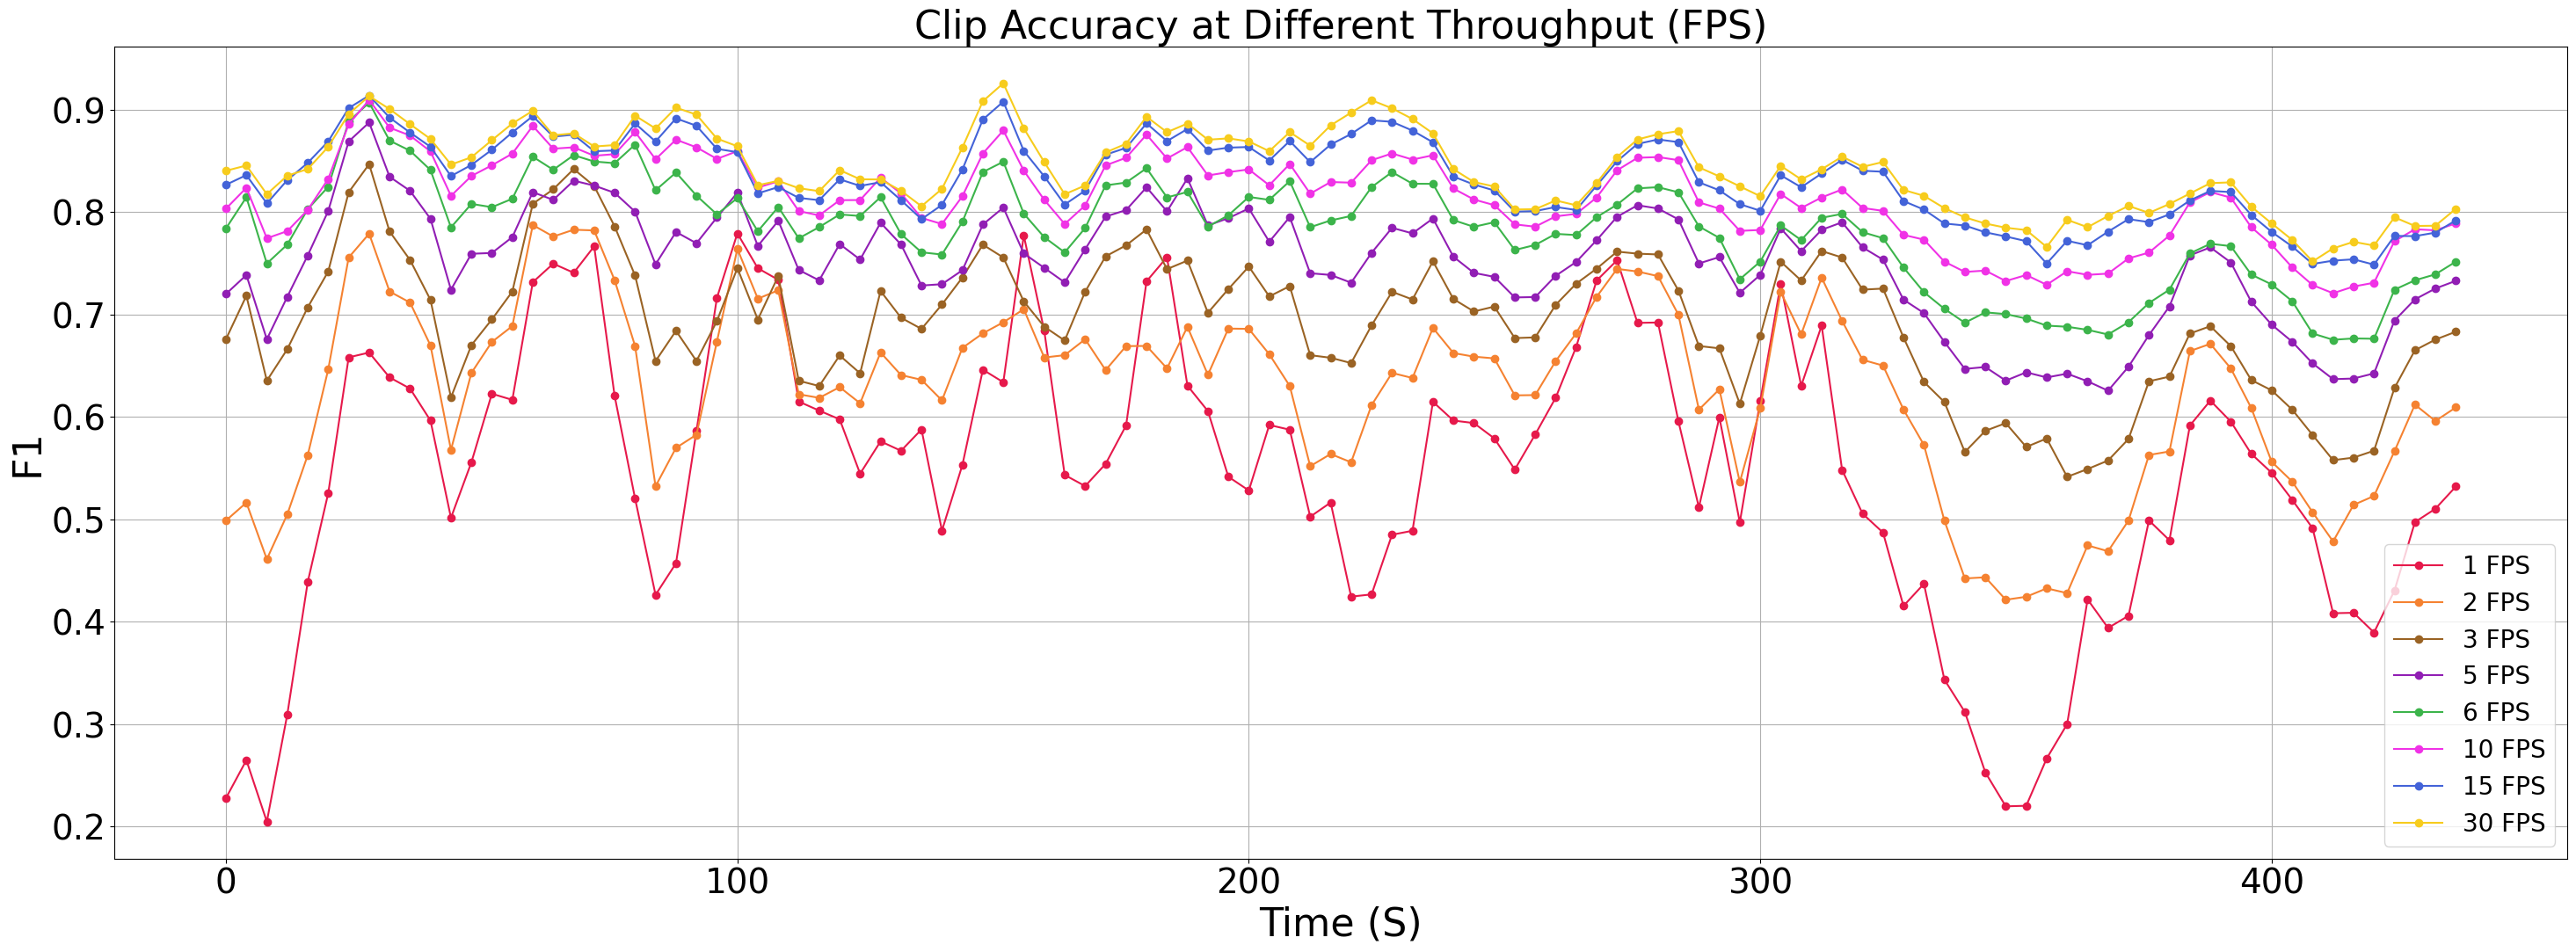

In [53]:
for result_dict_path in accuracy_result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict)

	for class_idx in list(result_dict.keys()):
		accuracy = extract_metric_list(result_dict[class_idx], fpss)
		combined_accuracy_dict = dict_combined_times(accuracy, interval)

		# time = extract_metric_time(result_dict[class_idx])
		first_key = list(combined_accuracy_dict.keys())[0]
		time = list(np.array(range(len(combined_accuracy_dict[first_key]))) * interval)
		
		plot_mutiple_lines(time, combined_accuracy_dict, 'Time (S)', 'F1', 'Clip Accuracy at Different Throughput (FPS)', USE_MANUAL_FPSS)

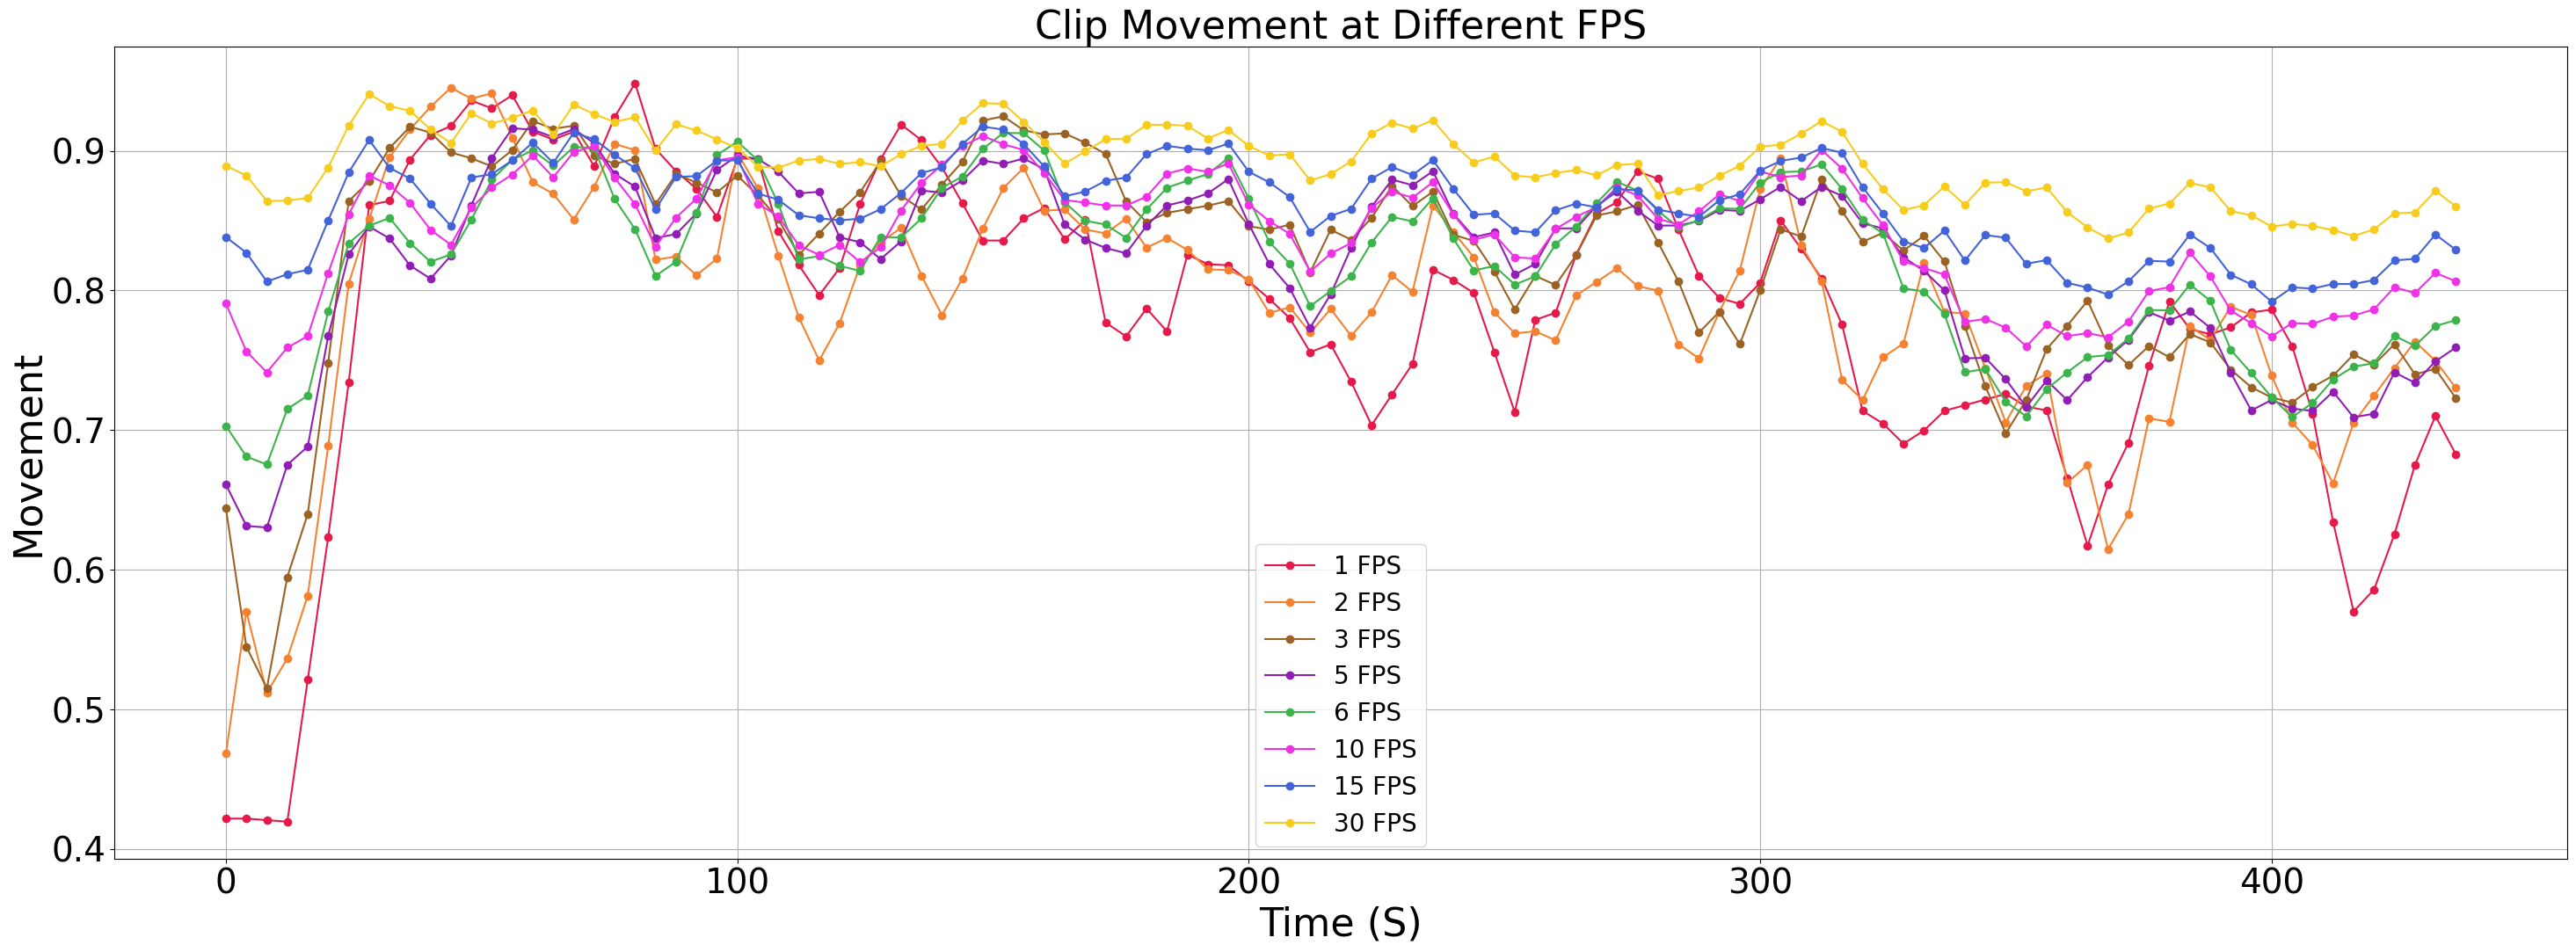

In [54]:
for result_dict_path in movement_result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict, data_type='movement')

	for class_idx in list(result_dict.keys()):
		movement = extract_metric_list(result_dict[class_idx], fpss, data_type='movement')
		combined_movement_dict = dict_combined_times(movement, interval)
		
		# time = extract_metric_time(result_dict[class_idx])
		first_key = list(combined_movement_dict.keys())[0]
		time = list(np.array(range(len(combined_movement_dict[first_key]))) * interval)
		
		plot_mutiple_lines(time, combined_movement_dict, 'Time (S)', 'Movement', 'Clip Movement at Different FPS', USE_MANUAL_FPSS)

In [55]:
def plot_two_ys(xs, y1s, y2s, x_label, y1_label, y2_label, title, label_size=28, font_size=32):
	fig, ax1 = plt.subplots(figsize=(36, 9))

	ax1.plot(xs, y1s, color=colors[0], marker='o', label=y1_label)  # 'o' denotes the marker type
	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y1_label, color=colors[0], fontsize=font_size)
	ax1.tick_params(axis='both', labelsize=label_size)

	ax2 = ax1.twinx()
	ax2.plot(xs, y2s, color=colors[3], marker='o', label=y2_label)  # 'o' denotes the marker type
	ax2.set_ylabel(y2_label, color=colors[3], fontsize=font_size)
	ax2.tick_params(axis='y', labelsize=label_size)

	plt.title(title, fontsize=font_size)
	plt.grid(True)

	plt.show()

Video3_Accuracy_Result


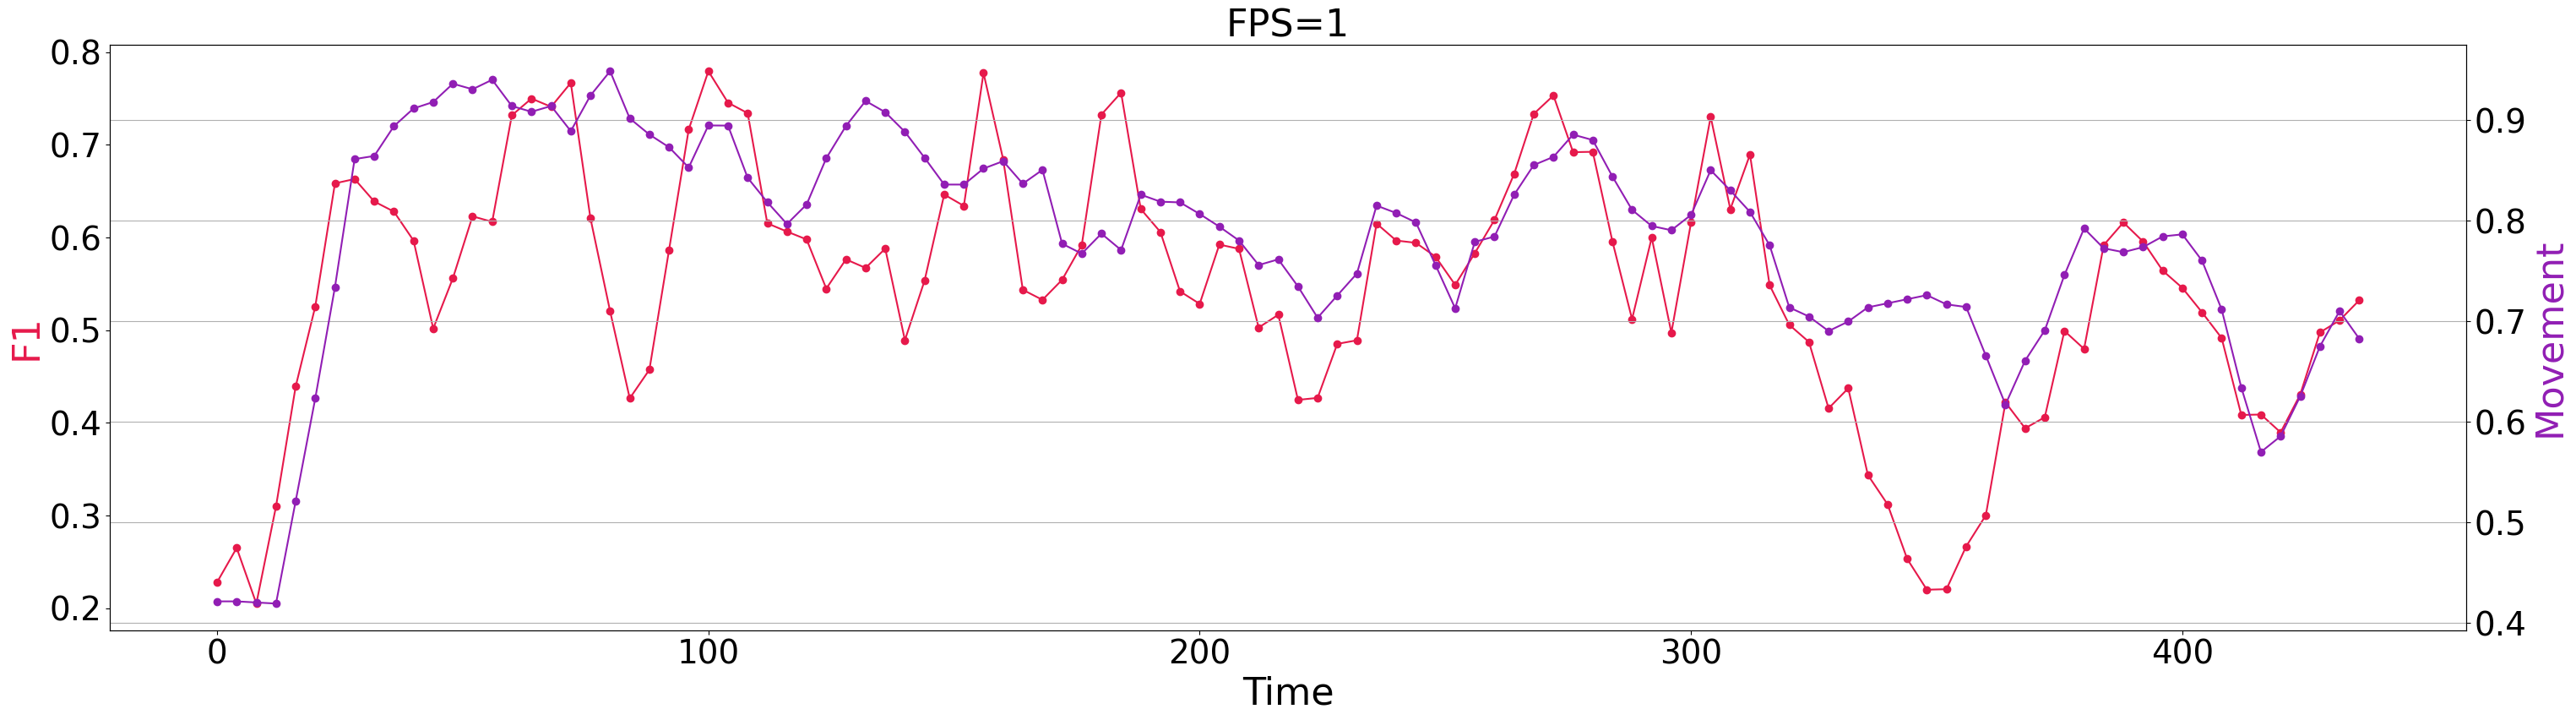

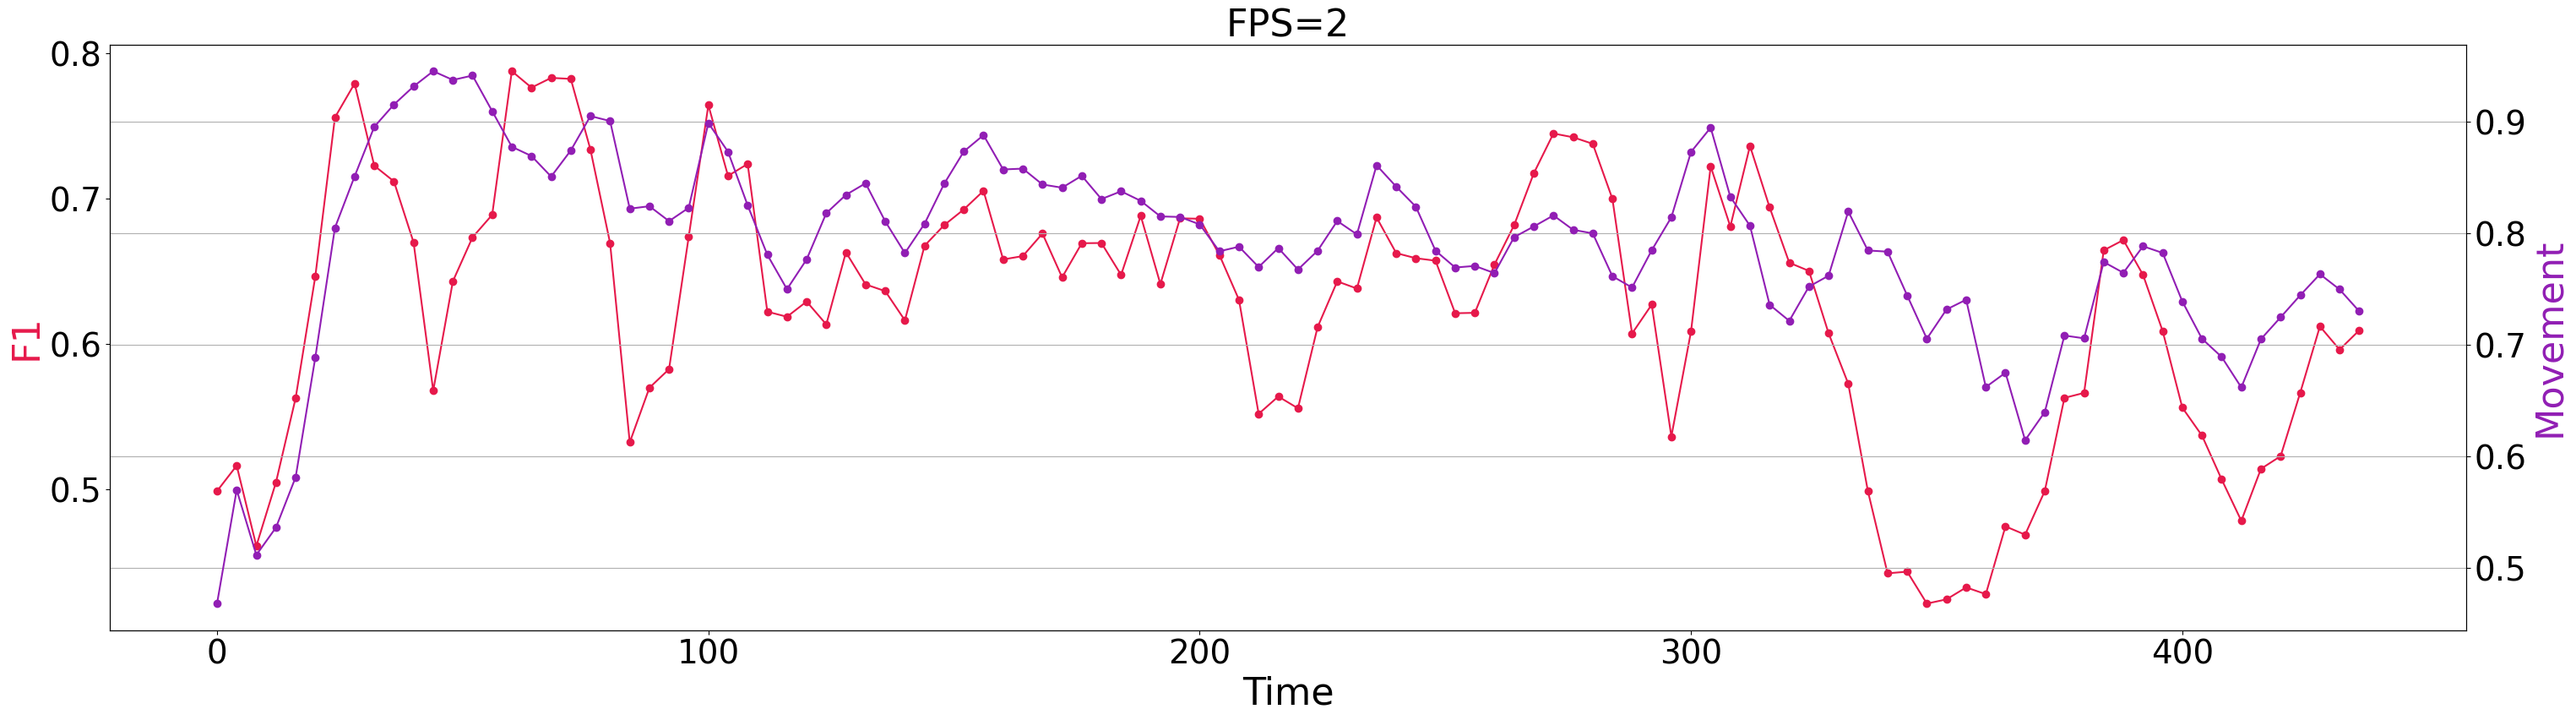

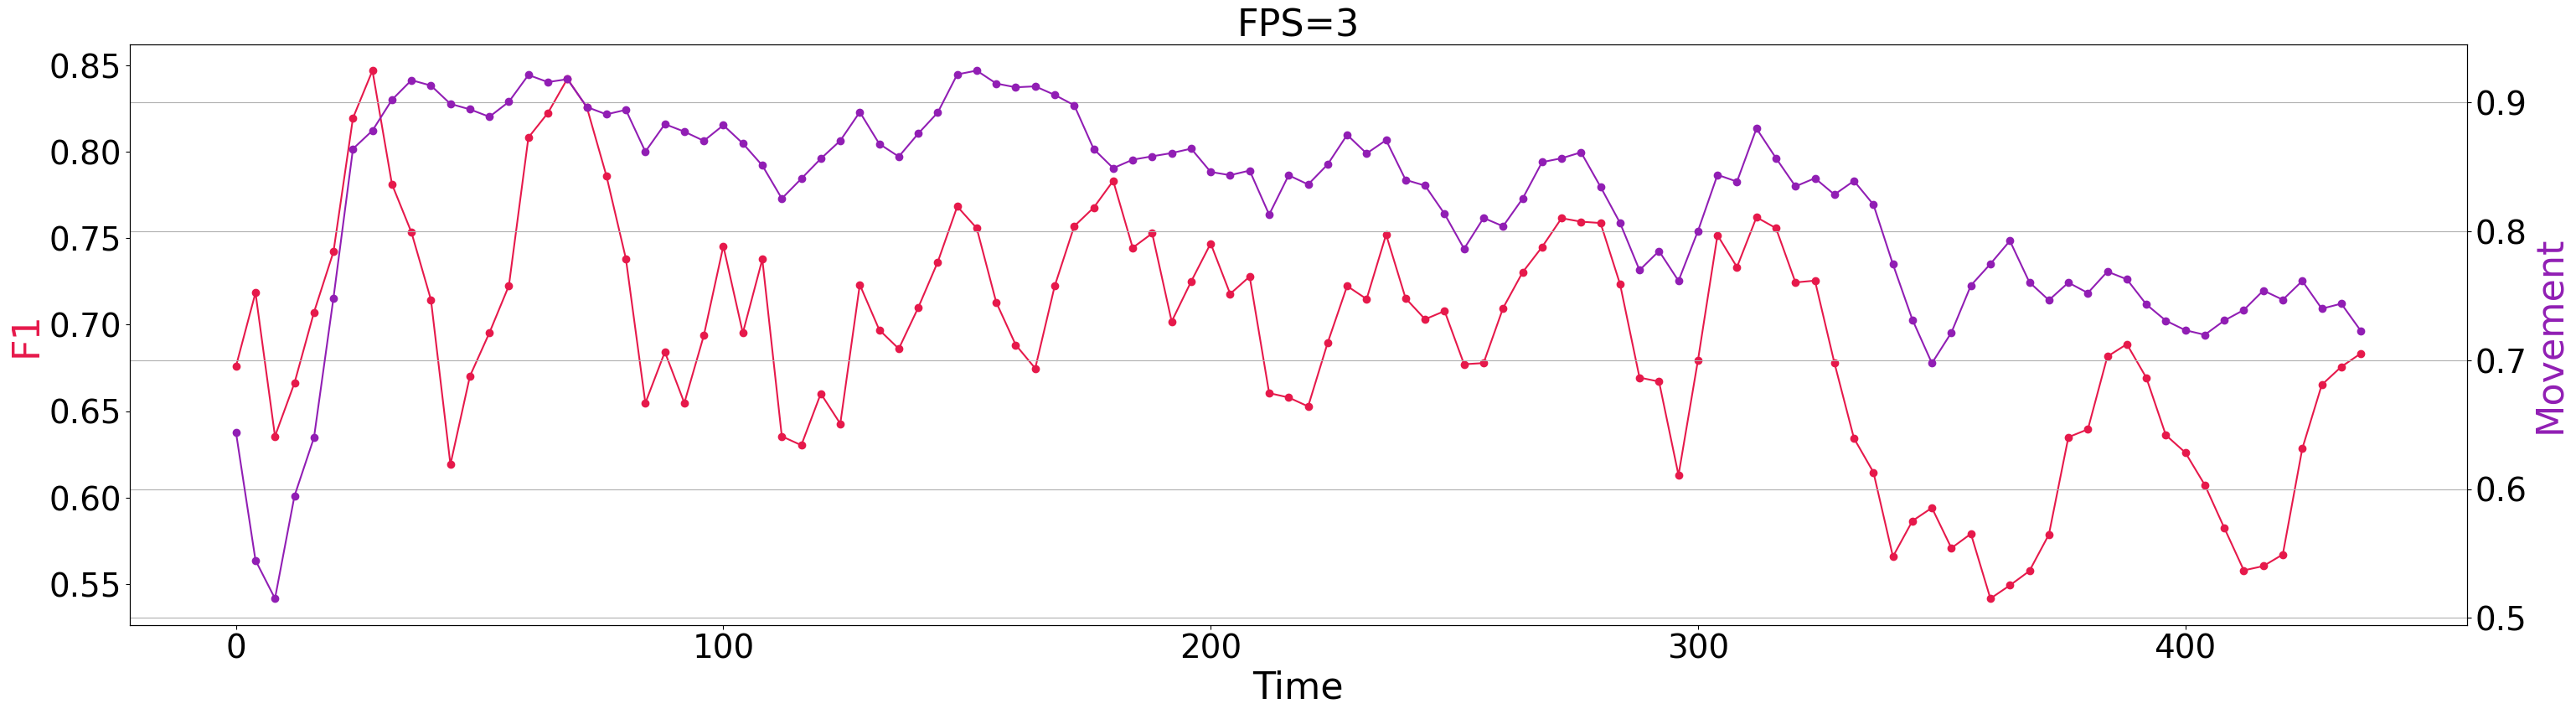

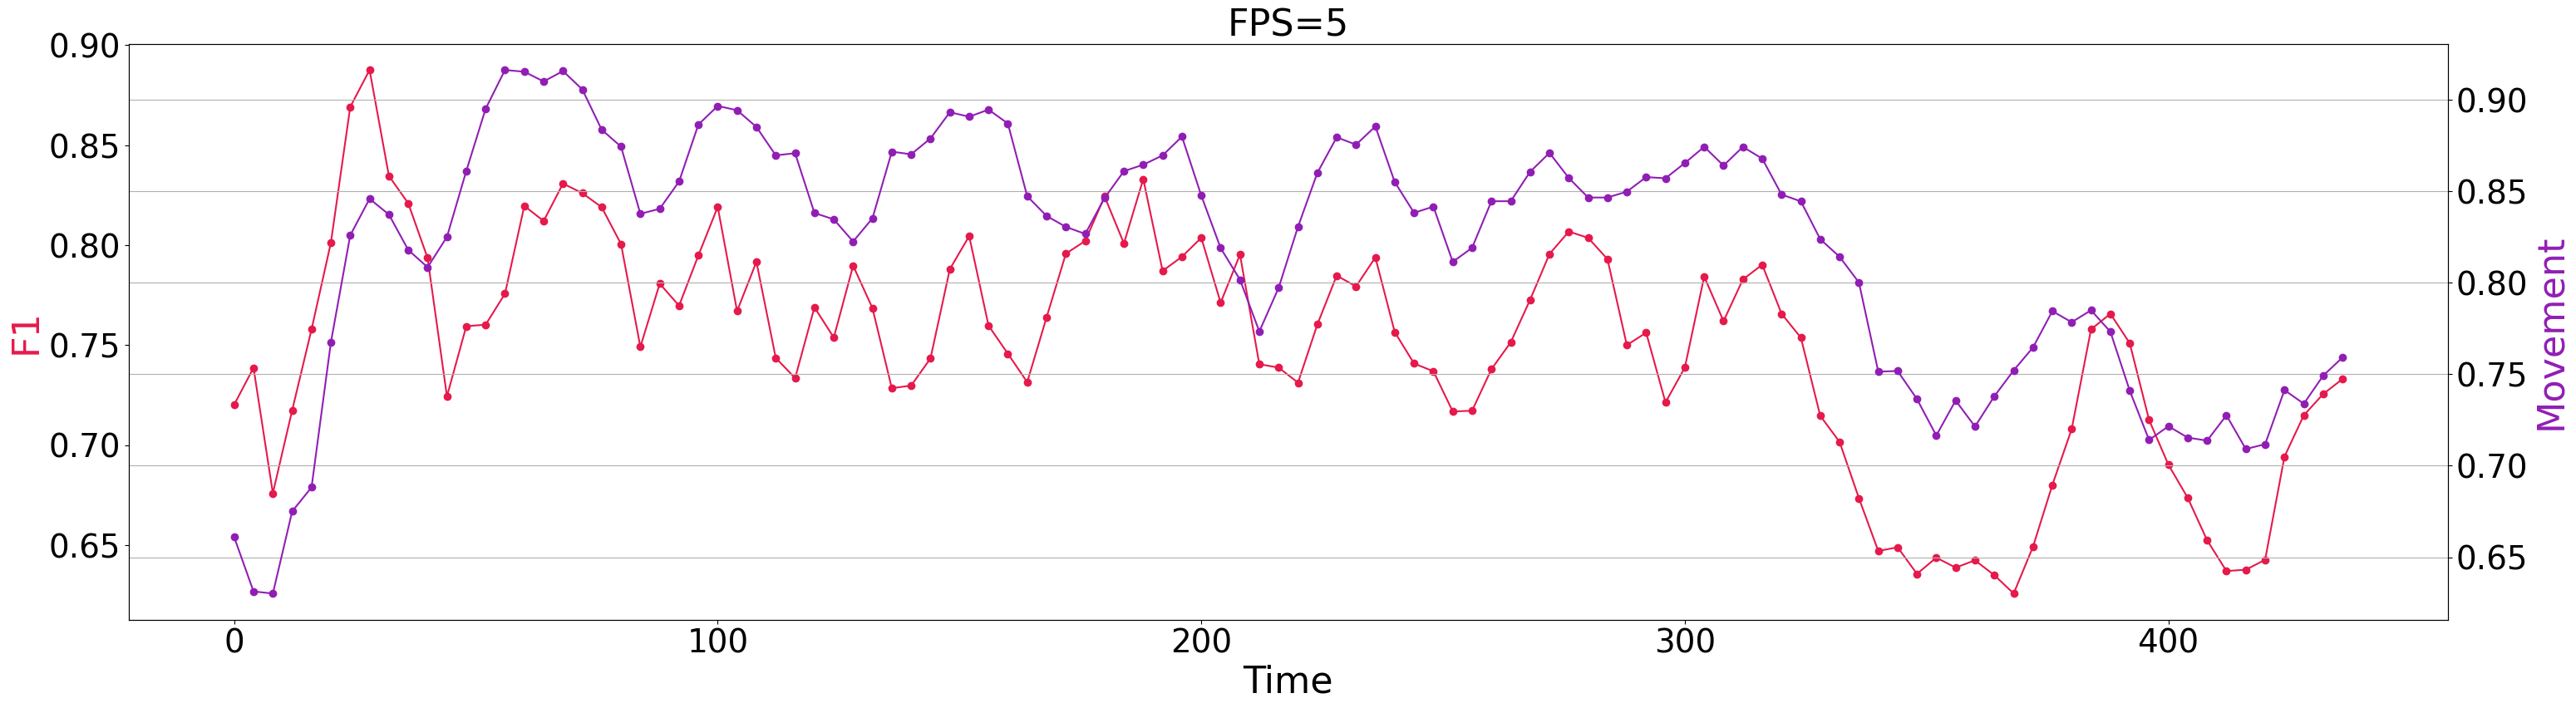

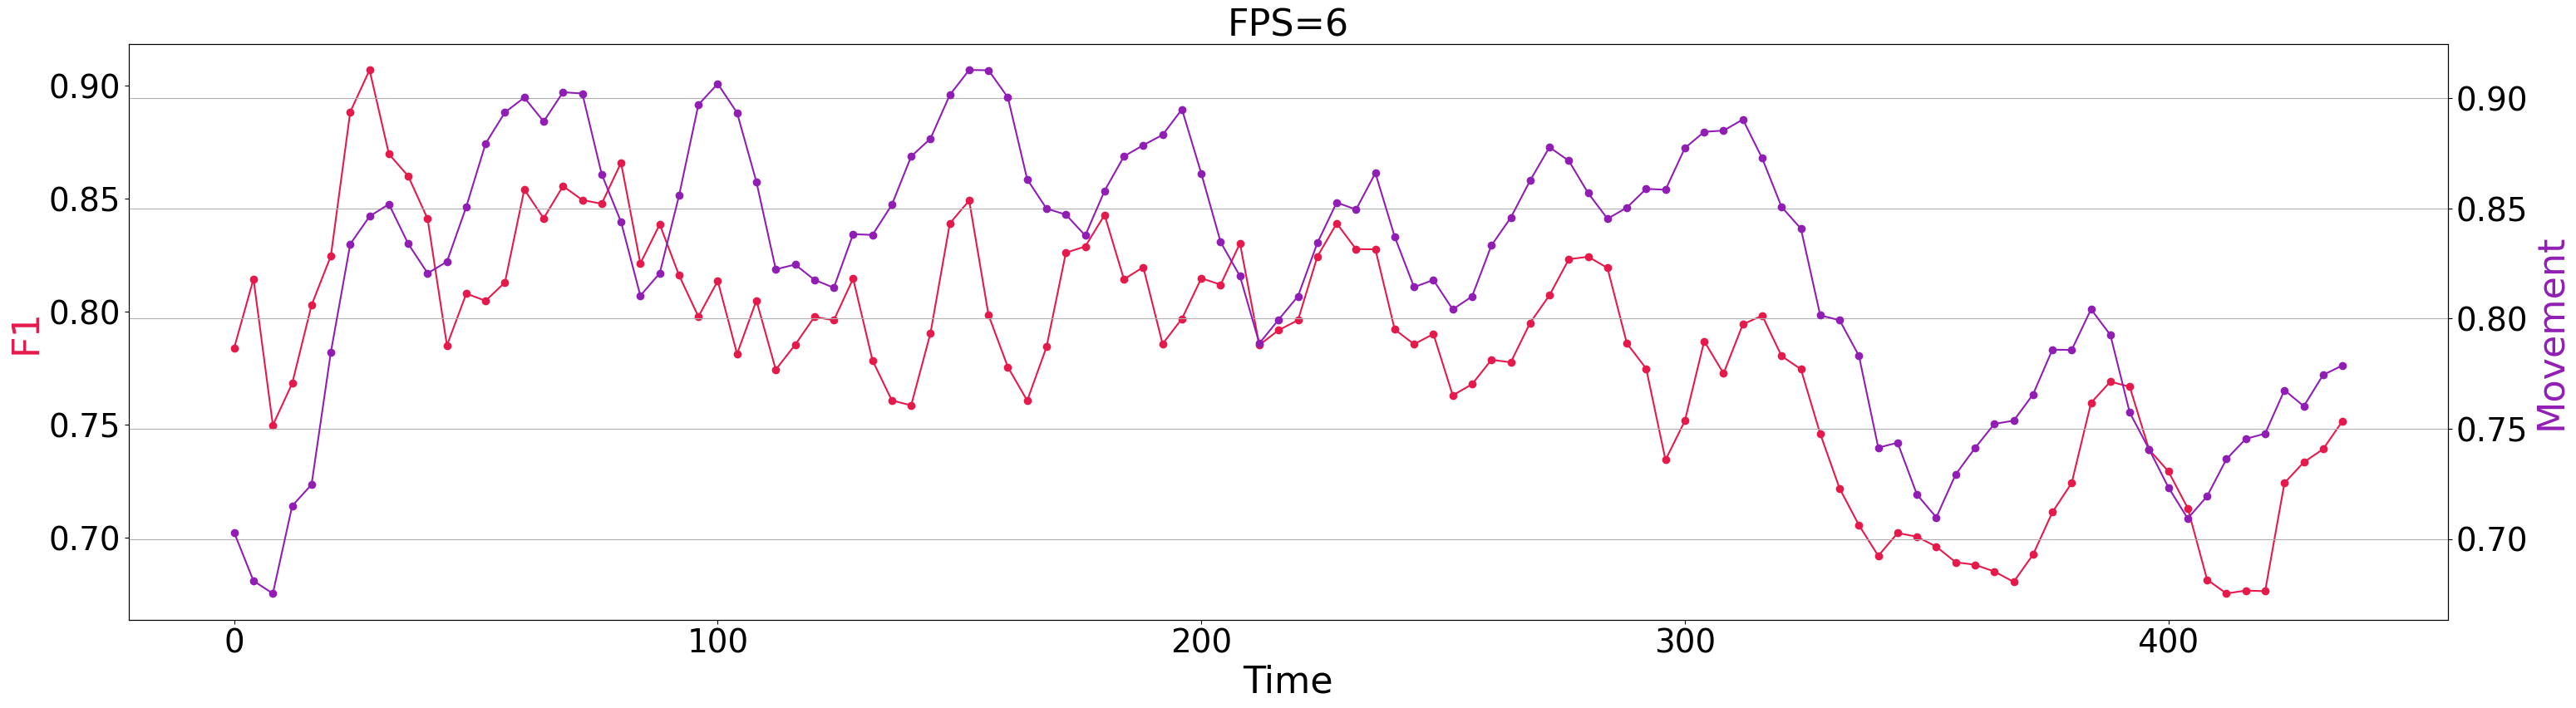

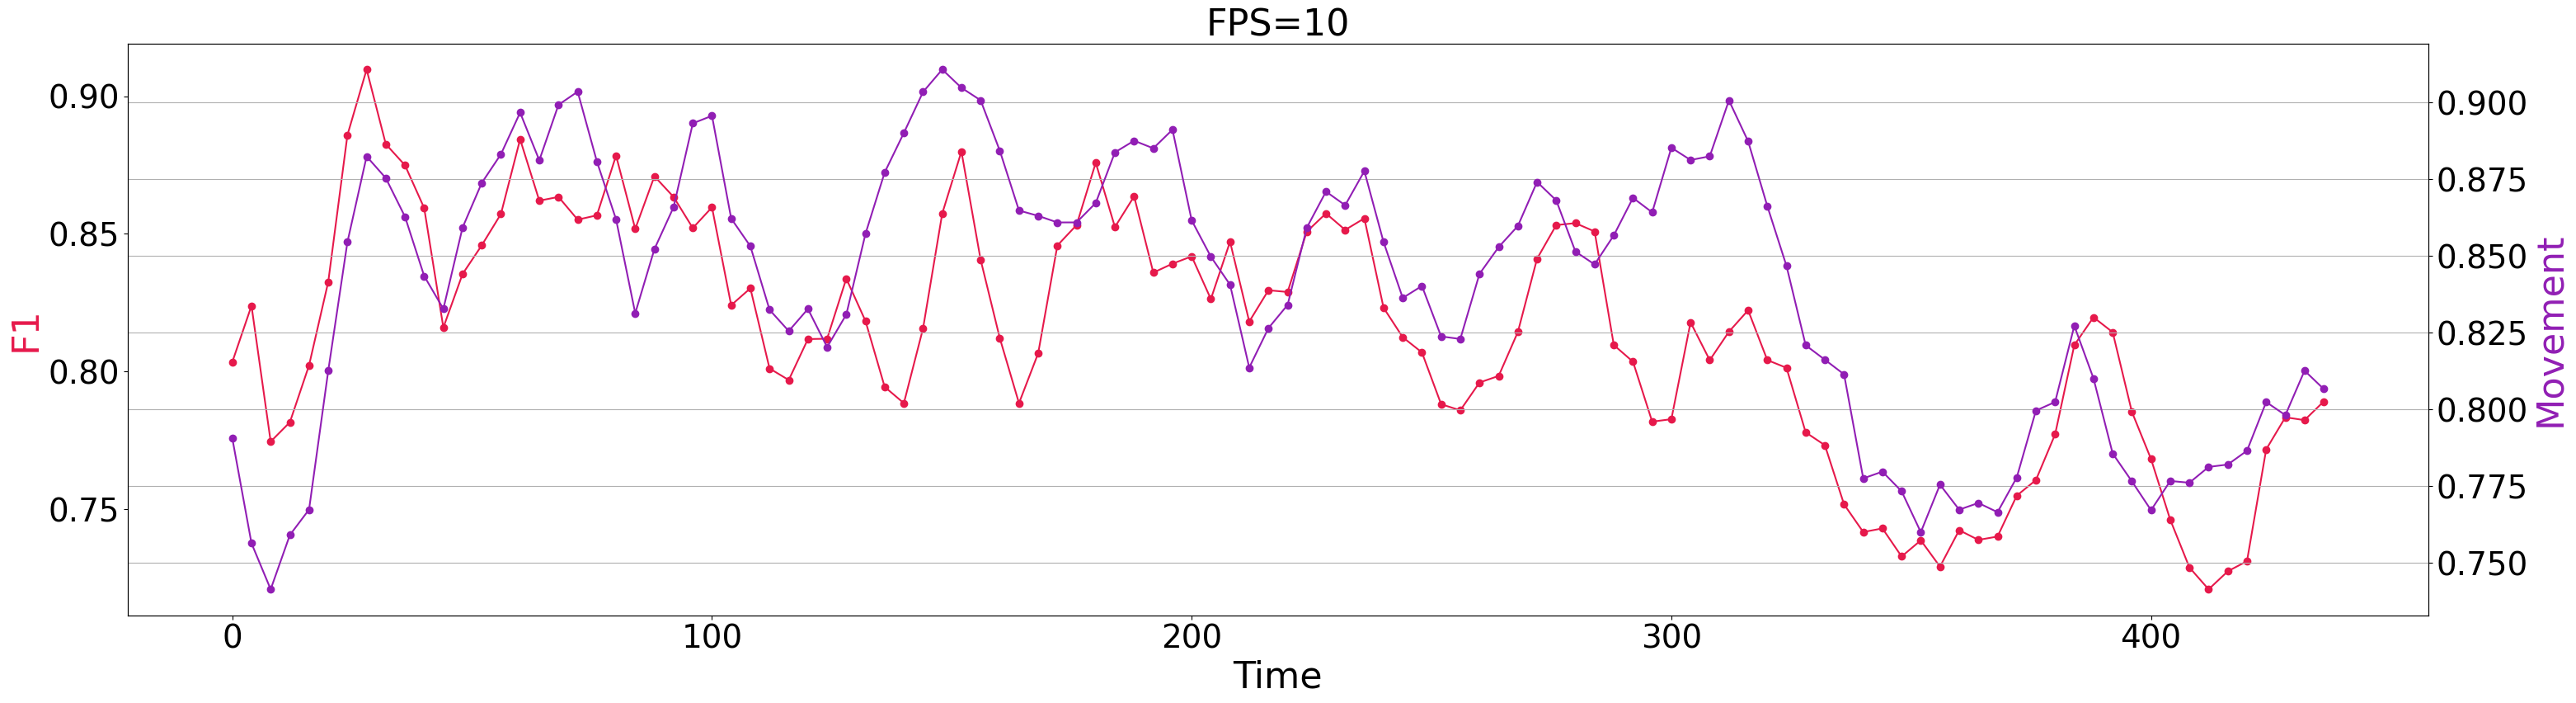

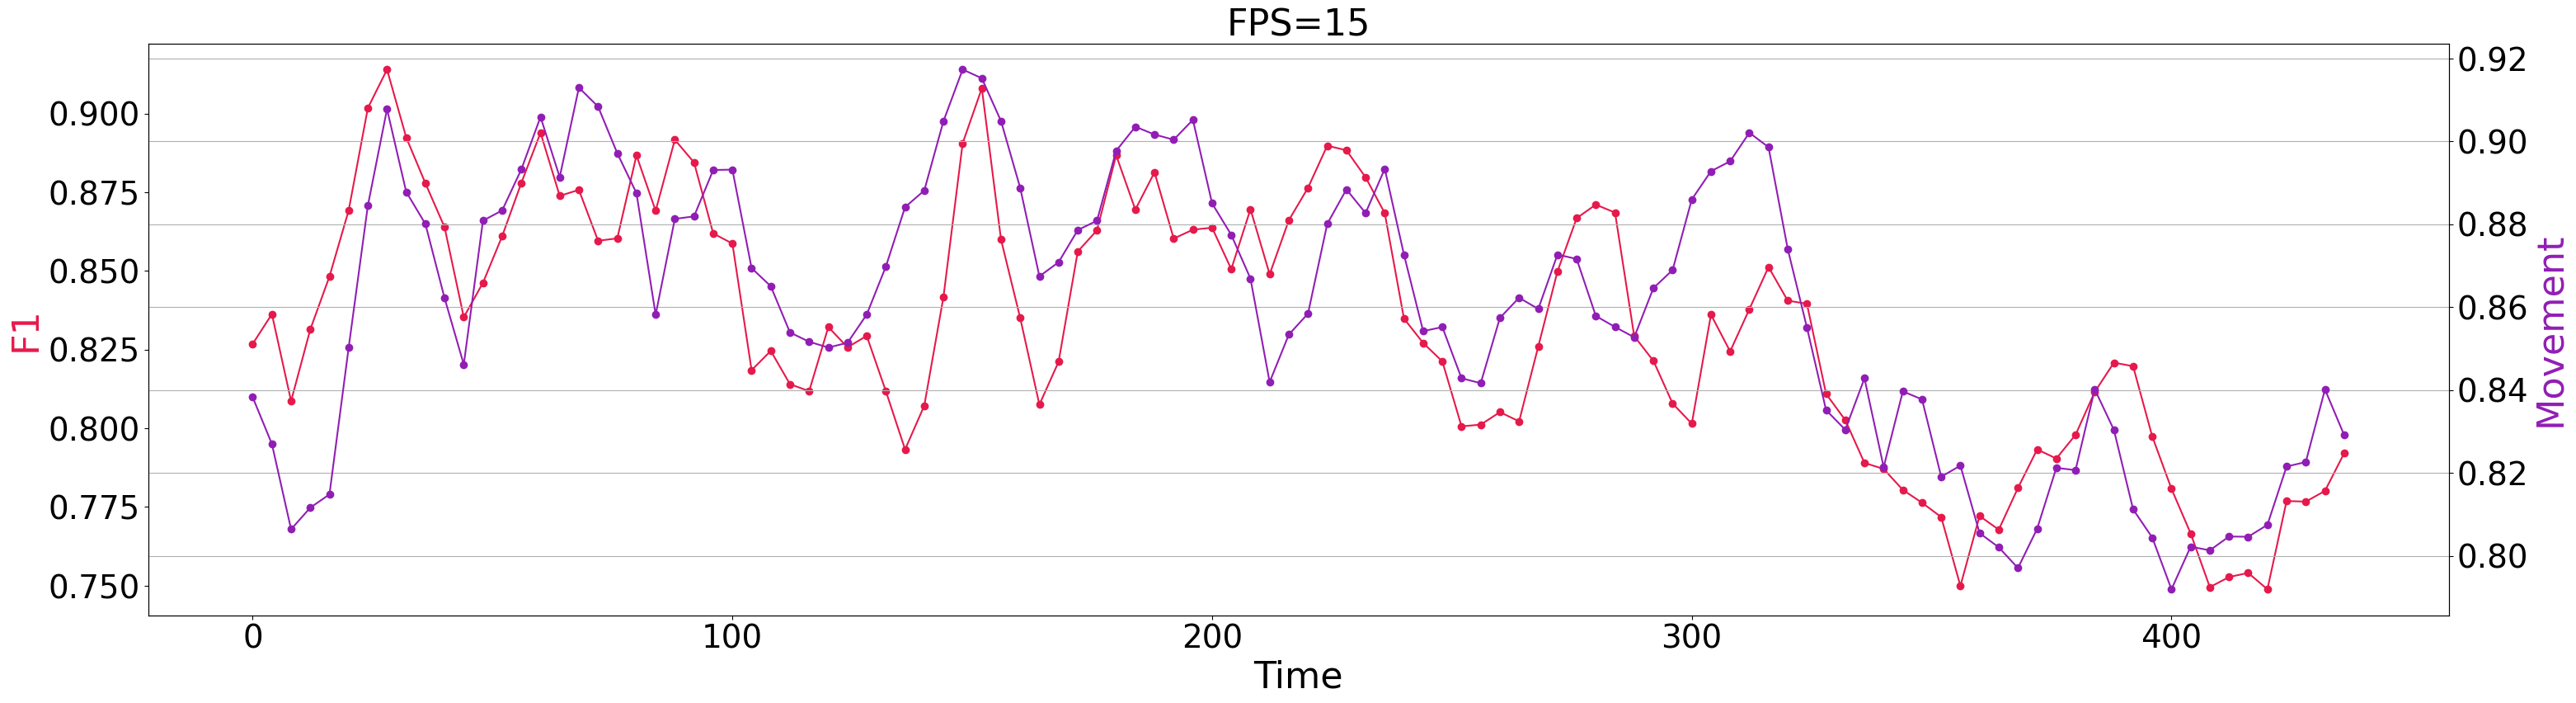

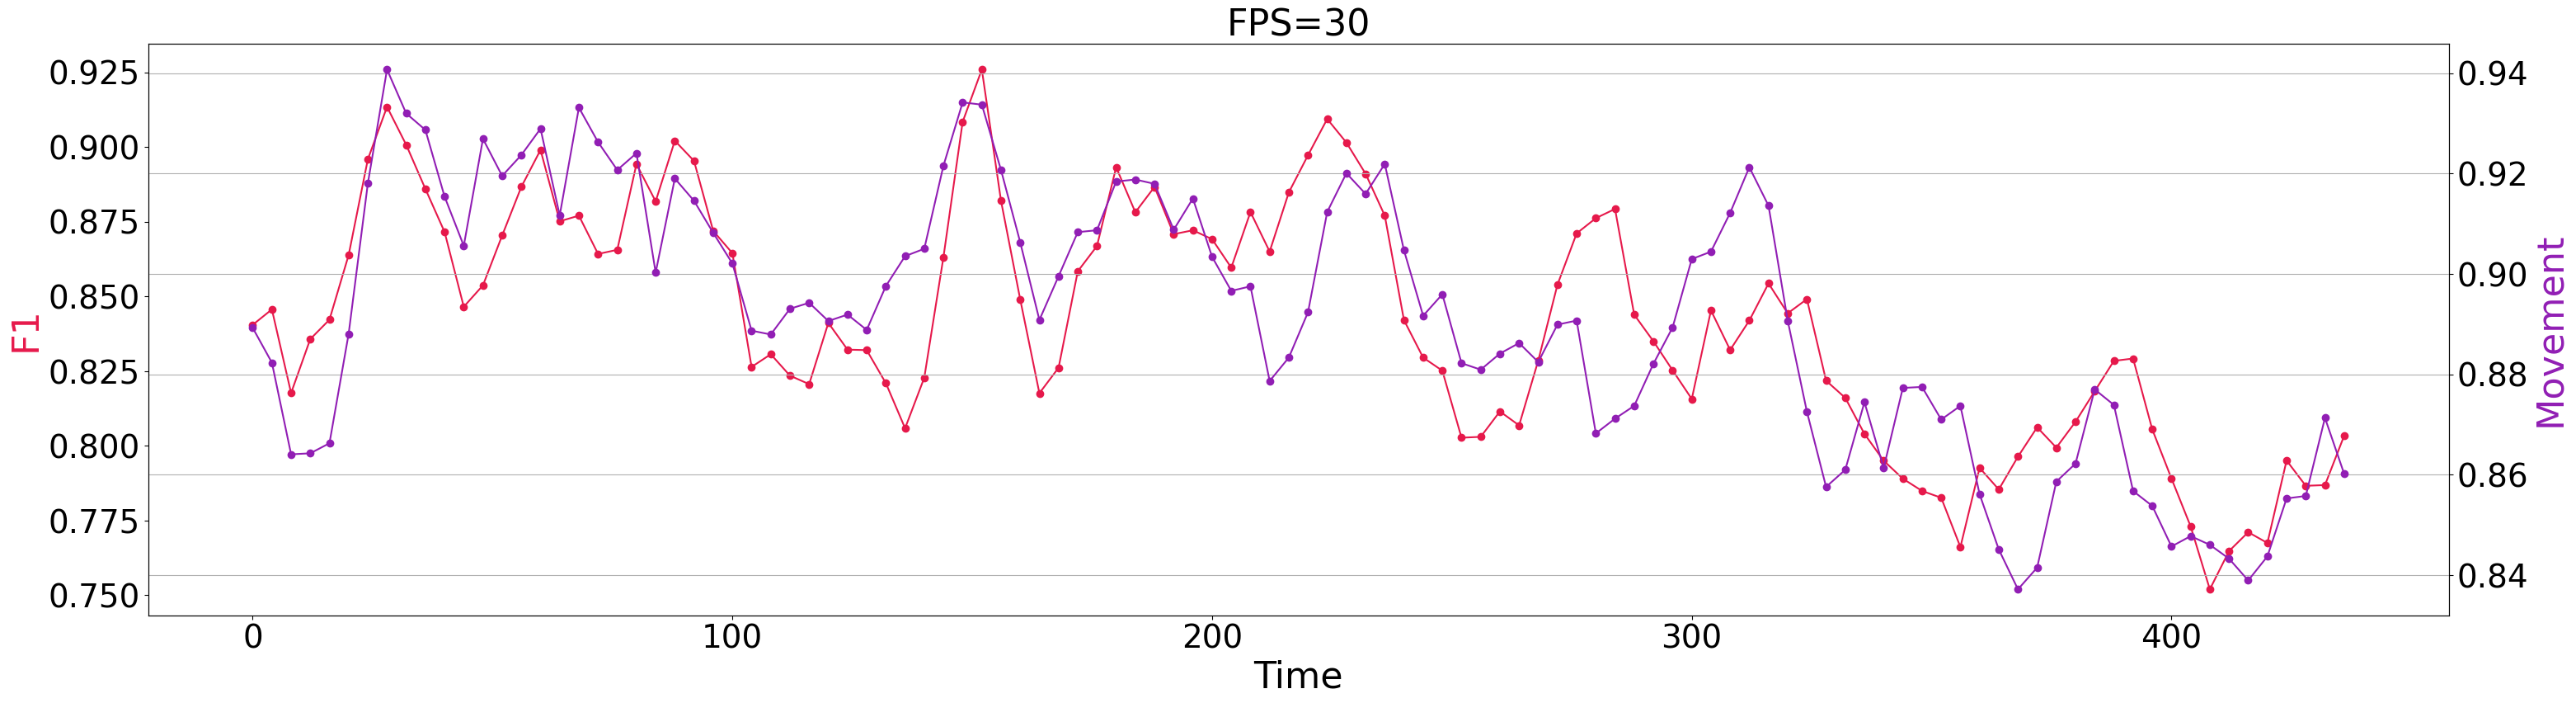

In [56]:
for i in range(len(accuracy_result_dict_paths)):
	print(f'{os.path.splitext(os.path.basename(accuracy_result_dict_paths[i]))[0]}')
	accuracy_result_dict_path = accuracy_result_dict_paths[i]
	accuracy_result_dict = load_json(accuracy_result_dict_path)
	
	fpss = extract_fpss(accuracy_result_dict)

	movement_result_dict_path = movement_result_dict_paths[i]
	movement_result_dict = load_json(movement_result_dict_path)

	for class_idx in list(accuracy_result_dict.keys()):
		accuracy_result = extract_metric_list(accuracy_result_dict[class_idx], fpss)
		movement_result = extract_metric_list(movement_result_dict[class_idx], fpss, data_type='movement')
		# time = extract_metric_time(accuracy_result_dict[class_idx])
		
		for fps in MANUAL_FPSS:
			combined_accuracy = combine_times(accuracy_result[fps], interval)
			combined_movement = combine_times(movement_result[fps], interval)
			time = list(np.array(range(len(combined_accuracy))) * interval)
			plot_two_ys(time, combined_accuracy, combined_movement, 'Time', 'F1', 'Movement', f'FPS={fps}')

In [57]:
def plot_scatter(x_points, y_points, x_label, y_label, title, x_range=(0, 1), y_range=(0, 1), label_size=28, font_size=32, legend_size=24):
		x_points = np.array(x_points)
		y_points = np.array(y_points)
		
		plt.figure(figsize=(6, 6))
		plt.scatter(x_points, y_points, color=colors[0])
		plt.title(title, fontsize=font_size)
		plt.xlabel(x_label, fontsize=font_size)
		plt.ylabel(y_label, fontsize=font_size)
		plt.xticks(fontsize=label_size)
		plt.yticks(fontsize=label_size)
		# plt.legend(fontsize=legend_size)
		plt.grid(True)
		
		plt.xlim(x_range)
		plt.ylim(y_range)
		
		plt.show()


Video3_Accuracy_Result
FPS: 1 -> Corr: 0.6988089123202009
FPS: 2 -> Corr: 0.6583540105932099
FPS: 3 -> Corr: 0.5377405761091619
FPS: 5 -> Corr: 0.6686604072469838
FPS: 6 -> Corr: 0.6366072306861209
FPS: 10 -> Corr: 0.7348273165956034
FPS: 15 -> Corr: 0.7692221913412497
FPS: 30 -> Corr: 0.801734980117303


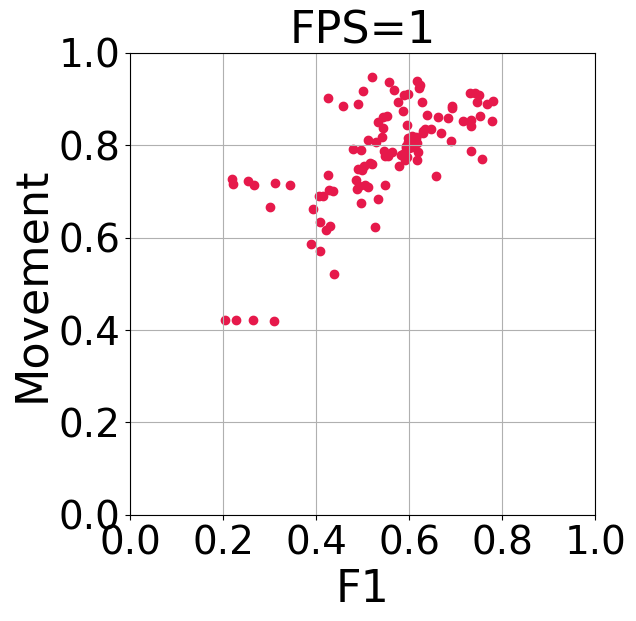

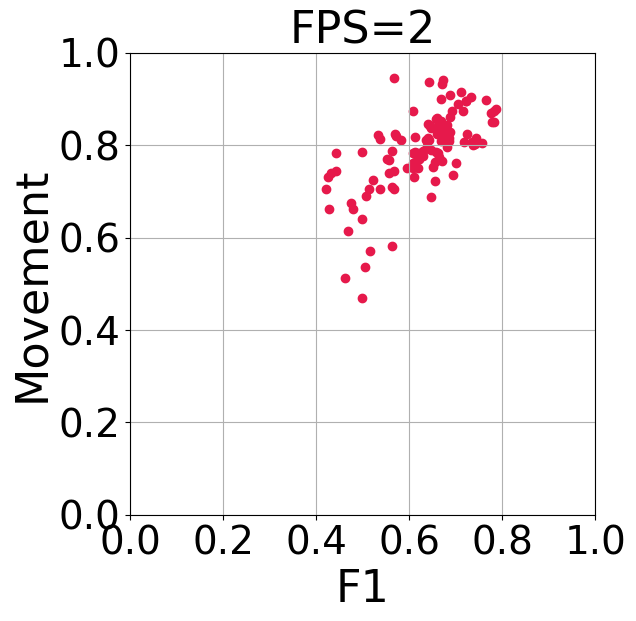

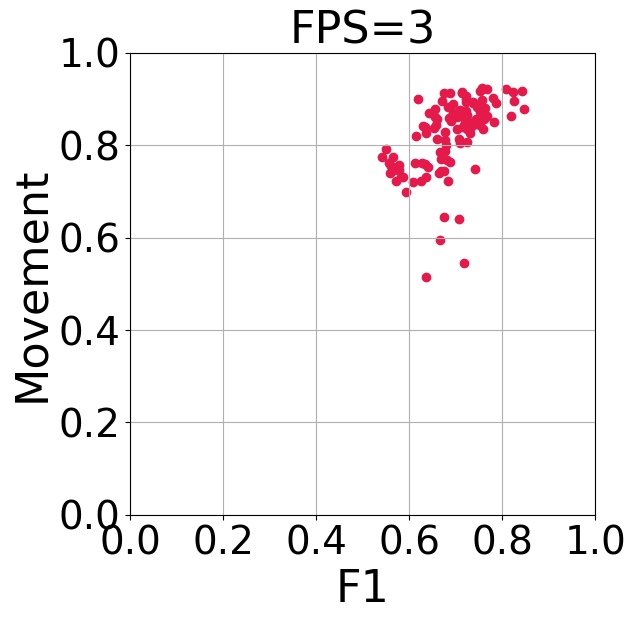

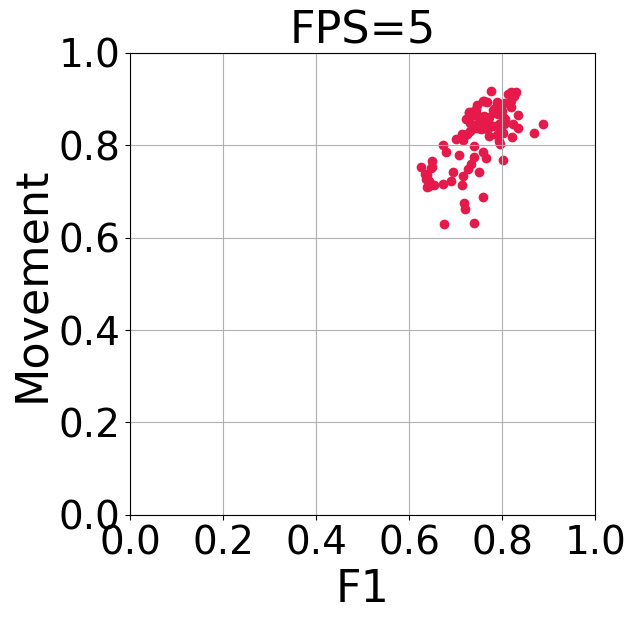

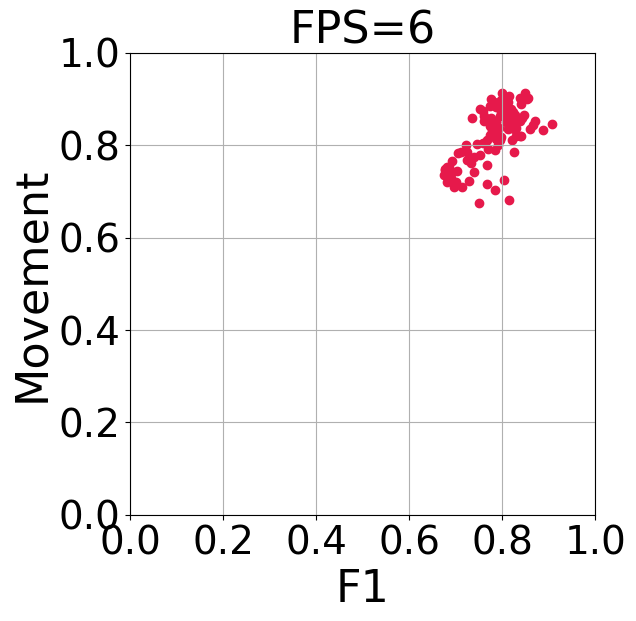

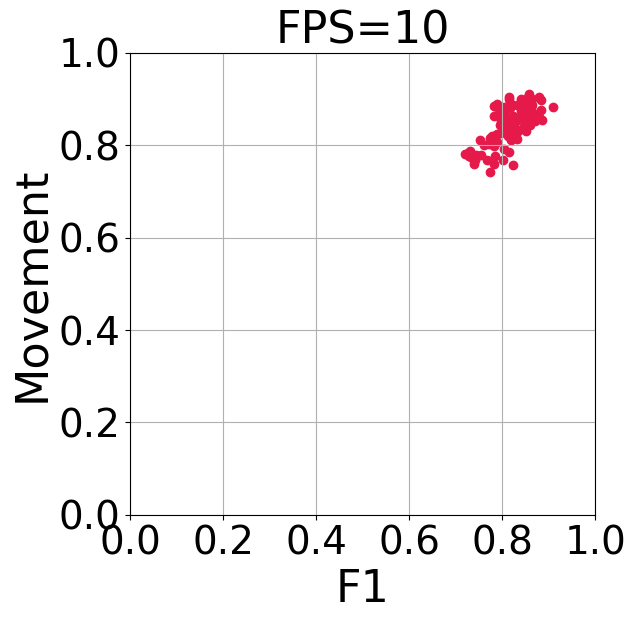

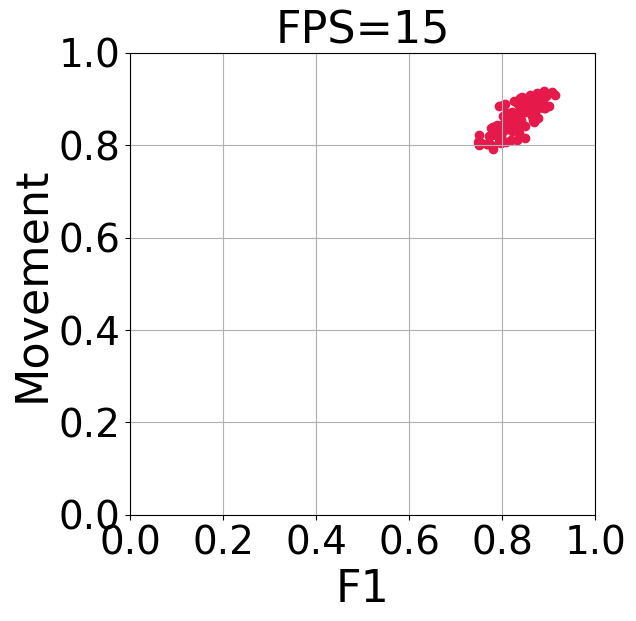

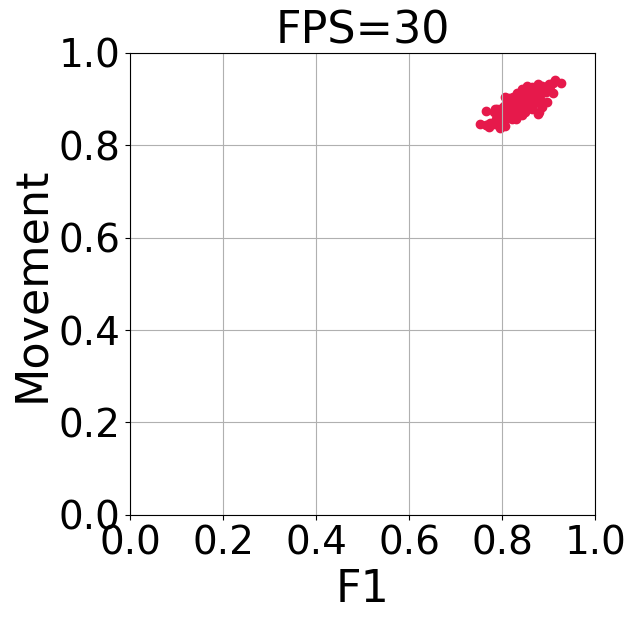

In [58]:
# Combined Correlation
for i in range(len(accuracy_result_dict_paths)):
	print(f'{os.path.splitext(os.path.basename(accuracy_result_dict_paths[i]))[0]}')
	accuracy_result_dict_path = accuracy_result_dict_paths[i]
	accuracy_result_dict = load_json(accuracy_result_dict_path)
	
	fpss = extract_fpss(accuracy_result_dict)

	movement_result_dict_path = movement_result_dict_paths[i]
	movement_result_dict = load_json(movement_result_dict_path)	

	for class_idx in list(accuracy_result_dict.keys()):
		accuracy_result = extract_metric_list(accuracy_result_dict[class_idx], fpss)
		movement_result = extract_metric_list(movement_result_dict[class_idx], fpss, data_type='movement')
		
		for fps in MANUAL_FPSS:
			combined_accuracy = combine_times(accuracy_result[fps], interval)
			combined_movement = combine_times(movement_result[fps], interval)

			correlation_matrix = np.corrcoef(combined_accuracy, combined_movement)
			correlation_coefficient = correlation_matrix[0, 1]
			print(f'FPS: {fps} -> Corr: {correlation_coefficient}')
			
		for fps in MANUAL_FPSS:
			combined_accuracy = combine_times(accuracy_result[fps], interval)
			combined_movement = combine_times(movement_result[fps], interval)

			plot_scatter(combined_accuracy, combined_movement, 'F1', 'Movement', f'FPS={fps}', label_size=28, font_size=32, legend_size=24)